<a href="https://colab.research.google.com/github/RISHIshrivas/iris-Classification/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
os.environ['KAGGLE_USERNAME'] = "chadrishi"
os.environ['KAGGLE_KEY'] = "a0df0e1e6e5e52f43b3093ecafe10b7f"

In [5]:
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [6]:
iris = pd.read_csv('Iris.csv')
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
y = iris.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = iris.iloc[0:100, [0, 2]].values

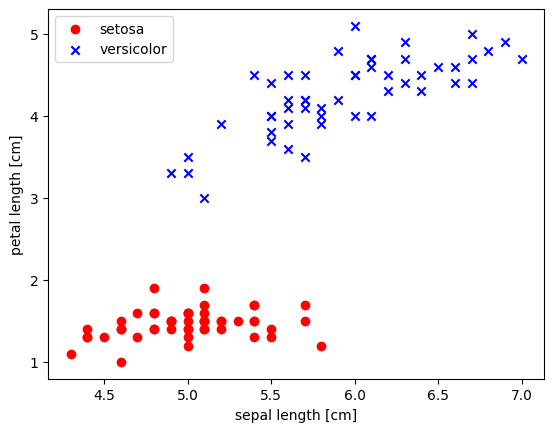

In [9]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [10]:
class Perceptron(object):
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
            return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)

In [12]:
ppn.fit(X, y);

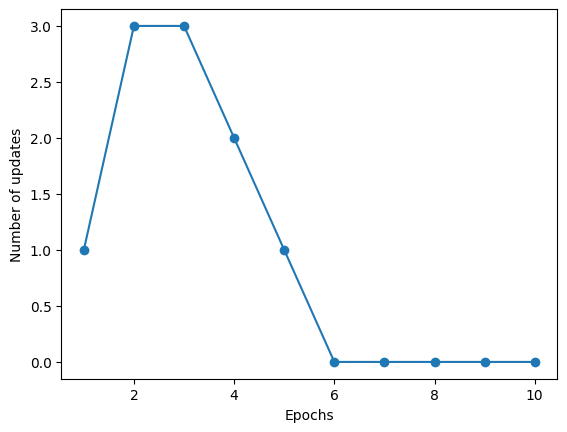

In [13]:
plt.plot(range(1, len(ppn.errors_) + 1),ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [14]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0],
                     y=X[y == cl, 1],
                     alpha=0.8,
                     c=colors[idx],
                     marker=markers[idx],
                     label=cl,
                     edgecolor='black')

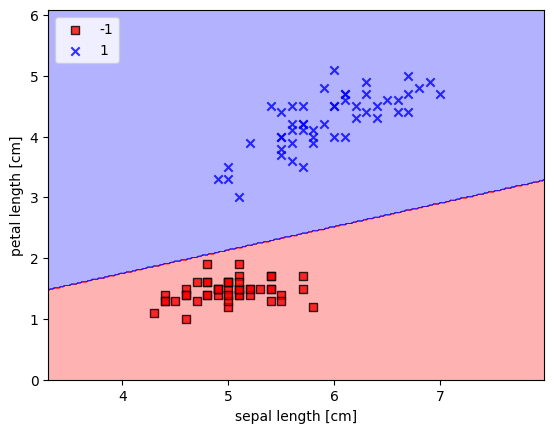

In [15]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show();

In [17]:
iris.head(10).style.background_gradient(cmap='Reds')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa
5,5.400000,3.900000,1.700000,0.400000,Iris-setosa
6,4.600000,3.400000,1.400000,0.300000,Iris-setosa
7,5.000000,3.400000,1.500000,0.200000,Iris-setosa
8,4.400000,2.900000,1.400000,0.200000,Iris-setosa
9,4.900000,3.100000,1.500000,0.100000,Iris-setosa


In [19]:
iris.tail(10).style.background_gradient(cmap='RdBu_r')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,6.700000,3.100000,5.600000,2.400000,Iris-virginica
141,6.900000,3.100000,5.100000,2.300000,Iris-virginica
142,5.800000,2.700000,5.100000,1.900000,Iris-virginica
143,6.800000,3.200000,5.900000,2.300000,Iris-virginica
144,6.700000,3.300000,5.700000,2.500000,Iris-virginica
145,6.700000,3.000000,5.200000,2.300000,Iris-virginica
146,6.300000,2.500000,5.000000,1.900000,Iris-virginica
147,6.500000,3.000000,5.200000,2.000000,Iris-virginica
148,6.200000,3.400000,5.400000,2.300000,Iris-virginica
149,5.900000,3.000000,5.100000,1.800000,Iris-virginica


In [20]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


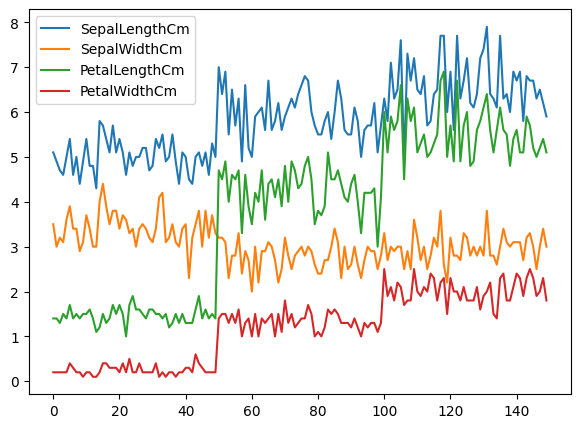

In [22]:
plt.rcParams['figure.figsize'] = [7, 5]
iris.plot()
plt.show()

In [23]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
iris.describe().style.background_gradient(cmap="Blues")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#**DATA SPLIT**

In [26]:
x = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

#**SOLVING MISSING VALUES**

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
imputer.fit(x)
x = imputer.transform(x)

In [30]:
SimpleImputer_model = SimpleImputer(missing_values = np.nan, strategy = 'mean')
x = SimpleImputer_model.fit_transform(x)

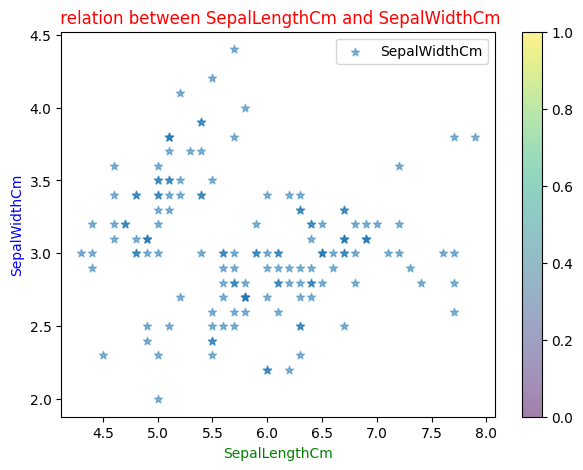

In [32]:
plt.figure(figsize=(7, 5))
plt.scatter(data=iris, x = "SepalLengthCm", y = "SepalWidthCm", marker="*", alpha=0.5)
plt.title(' relation between SepalLengthCm and SepalWidthCm', fontsize=12, color = "red")
plt.xlabel("SepalLengthCm", fontsize = 10, color = "green")
plt.ylabel("SepalWidthCm", fontsize = 10, color = "blue")
plt.legend()
plt.colorbar()
plt.show();

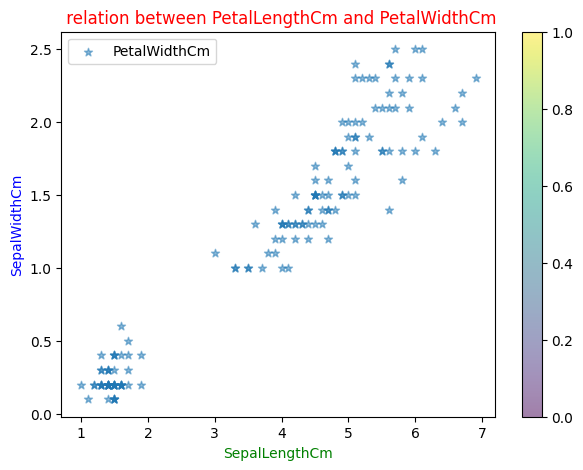

In [33]:
plt.figure(figsize=(7, 5))
plt.scatter(data=iris, x = "PetalLengthCm", y = "PetalWidthCm", marker="*", alpha=0.5)
plt.title(' relation between PetalLengthCm and PetalWidthCm', fontsize=12, color = "red")
plt.xlabel("SepalLengthCm", fontsize = 10, color = "green")
plt.ylabel("SepalWidthCm", fontsize = 10, color = "blue")
plt.legend()
plt.colorbar()
plt.show()

In [34]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

#**Label Encoding**

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
LabelEncoder_model = LabelEncoder()
y_new = LabelEncoder_model.fit_transform(y)

In [38]:
y_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#**Spliting The Data**

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_new, test_size = 0.25, random_state = 0)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y_new, test_size=0.2, random_state=120)

In [42]:
x_train.shape

(120, 4)

In [43]:
y_train.shape

(120,)

In [44]:
x_test.shape

(30, 4)

In [45]:
y_test.shape

(30,)

#**Evaluating The Model**

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [50]:
LogisticRegression_model = LogisticRegression()
SGDClassifier_model = SGDClassifier(alpha=0.001)
LogisticRegression_model.fit(x_train, y_train)
SGDClassifier_model.fit(x_train, y_train)

SGDClassifier(alpha=0.001)

In [51]:
print(f"the score in the train is ==> {LogisticRegression_model.score(x_train, y_train)}")

the score in the train is ==> 0.9666666666666667


In [52]:
print(f"the score in the train is ==> {SGDClassifier_model.score(x_train, y_train)}")

the score in the train is ==> 0.7166666666666667


In [53]:
y_pred1 = LogisticRegression_model.predict(x_test)

In [54]:
y_pred1

array([1, 2, 1, 1, 2, 0, 2, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 1, 2, 1, 0, 0, 0])

In [55]:
y_pred2 =SGDClassifier_model.predict(x_test)

In [56]:
y_pred2

array([1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 0])

#**Accuracy**

In [58]:
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [59]:
print(f"the accuracy is ==> {accuracy_score(y_test, y_pred1)}")

the accuracy is ==> 1.0


In [60]:
print(f"the accuracy is ==> {accuracy_score(y_test, y_pred2)}")

the accuracy is ==> 0.7666666666666667


#**Classification Report**

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.30      0.46        10
           2       0.58      1.00      0.74         7

    accuracy                           0.77        30
   macro avg       0.82      0.77      0.71        30
weighted avg       0.85      0.77      0.73        30



In [63]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [65]:
# Confusion_matrix
def confusion_matrix(y_true, y_pred):
    cm = np.zeros((len(np.unique(y_true)), len(np.unique(y_pred))))
    for i in range(len(y_true)):
        cm[y_true[i], y_pred[i]] += 1
    return cm

In [66]:
print(f"{confusion_matrix(y_test, y_pred1)}")

[[13.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  7.]]


In [67]:
print(f"{confusion_matrix(y_test, y_pred2)}")

[[13.  0.  0.]
 [ 2.  3.  5.]
 [ 0.  0.  7.]]


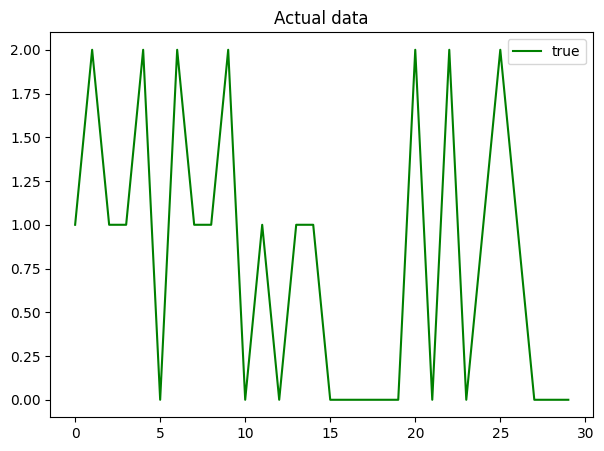

In [68]:
plt.figure(figsize=(7, 5))
plt.plot(y_test, c="green", label="true")
plt.title("Actual data")
plt.legend()
plt.show()

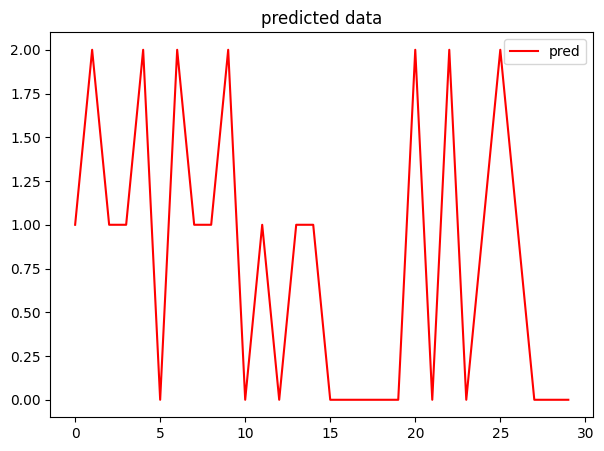

In [69]:
plt.figure(figsize=(7, 5))
plt.plot(y_pred1, c="red", label="pred")
plt.title("predicted data")
plt.legend()
plt.show()

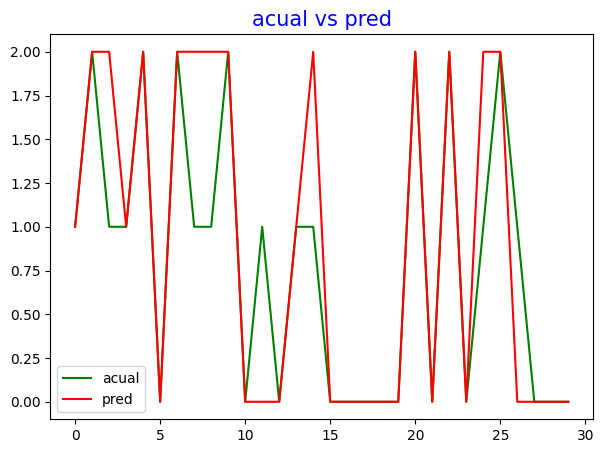

In [70]:
from sklearn.linear_model import SGDClassifier
plt.figure(figsize=(7, 5))
plt.plot(y_test, color="green", label="acual")
plt.plot(y_pred2, color="red", label="pred")
plt.title("acual vs pred", c="blue", fontsize=15)
plt.legend()
plt.show()